In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from sklearn import datasets

import io
import numpy as np
import pandas as pd
import scipy.stats as stat
import statsmodels.api as sm

pd.options.display.max_columns = 200

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Question

The cost of living among countries vary dramitcally, what additional ecomonic metrics might be attributing to this expense? 

For example, do places with a higher quality of life also have a higher cost of living? 

Making a lot of assumptions about this data, especially assuming that many of these independent variables are directly impacting the cost of living in these countries. However, my main goal here is to explore multiple regression to improve my working knowledge of some more in-depth stats.

## To start we'll upload the 5 csv files we're going to use and label them accordingly

In [ ]:
from google.colab import files

countryCostOfLiving = files.upload()
countryCrime = files.upload()
countryRealEstatePrice = files.upload()
countryPopulationDensity = files.upload()
countryQualityOfLife = files.upload()

Saving Cost of living index by country 2020.csv to Cost of living index by country 2020.csv


Saving Crime index by countries 2020.csv to Crime index by countries 2020.csv


Saving Properties price index by countries 2020.csv to Properties price index by countries 2020.csv


Saving Pupulation density by countries.csv to Pupulation density by countries.csv


Saving Quality of life index by countries 2020.csv to Quality of life index by countries 2020.csv


In [ ]:
costOfLiving_df = pd.read_csv(io.BytesIO(countryCostOfLiving['Cost of living index by country 2020.csv']))
costOfLiving_df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,Denmark,83.00,31.92,58.57,61.74,100.75,100.88
...,...,...,...,...,...,...,...
127,Uzbekistan,26.01,7.54,17.18,21.59,20.17,24.31
128,Syria,25.31,5.68,15.92,22.42,21.38,11.46
129,India,24.58,5.68,15.54,24.55,17.17,54.30
130,Afghanistan,24.24,4.03,14.58,17.70,17.38,28.20


In [ ]:
crime_df = pd.read_csv(io.BytesIO(countryCrime['Crime index by countries 2020.csv']))
crime_df

,Country,Crime Index,Safety Index
0,Venezuela,84.49,15.51
1,Papua New Guinea,81.93,18.07
2,South Africa,77.49,22.51
3,Afghanistan,76.23,23.77
4,Honduras,76.11,23.89
...,...,...,...
124,Japan,20.66,79.34
125,Georgia,20.21,79.79
126,United Arab Emirates,15.70,84.30
127,Taiwan,15.65,84.35


In [ ]:
realEstatePrice_df = pd.read_csv(io.BytesIO(countryRealEstatePrice['Properties price index by countries 2020.csv']))
realEstatePrice_df

,Country,Price To Income Ratio,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Price To Rent Ratio City Centre,Price To Rent Ratio Outside Of City Centre,Mortgage As A Percentage Of Income,Affordability Index
0,Venezuela,133.29,6.22,6.45,16.08,15.49,3025.03,0.03
1,Syria,60.83,2.71,3.00,36.93,33.29,662.83,0.15
2,Hong Kong,47.46,1.77,1.83,56.45,54.74,303.35,0.33
3,Cambodia,42.33,4.78,6.20,20.93,16.13,479.45,0.21
4,Kenya,31.63,2.15,4.07,46.56,24.54,472.19,0.21
...,...,...,...,...,...,...,...,...
99,Palestine,4.38,7.16,7.53,13.97,13.28,46.46,2.15
100,South Africa,3.93,9.85,11.30,10.15,8.85,47.50,2.11
101,Puerto Rico,3.53,9.34,8.12,10.70,12.31,27.25,3.67
102,United States,3.52,10.36,11.23,9.65,8.90,26.35,3.79


In [ ]:
populationDensity_df = pd.read_csv(io.BytesIO(countryPopulationDensity['Pupulation density by countries.csv']))
populationDensity_df

,Rank,Country (or dependent territory),Area km2,Area mi2,Population,Density pop./km2,Density pop./mi2,Date,Population source
0,–,Macau,32.90,13,"6,76,100","20,550","53,224","September 30, 2019",Official quarterly estimate
1,1,Monaco,2.02,0.78,"38,300","18,960","49,106","December 31, 2018",Official estimate
2,2,Singapore,722.5,279,"57,03,600","7,894","20,445","July 1, 2019",Official estimate
3,–,Hong Kong,"1,106",427,"75,00,700","6,782","17,565","December 31, 2019",Official estimate
4,–,Gibraltar (UK),6.8,2.6,"33,701","4,956","12,836","July 1, 2019",UN projection
...,...,...,...,...,...,...,...,...,...
246,194,Mongolia,"15,64,100","6,03,902","30,00,000",1.9,4.9,"January 24, 2015",Official estimate
247,–,Pitcairn Islands (UK),47.3,18,56,1.2,3.1,"September 20, 2016",2013 census result
248,–,Falkland Islands (UK),"12,173","4,700","2,563",0.21,0.54,"April 15, 2012",2012 census result
249,–,Svalbard and Jan Mayen (Norway),"61,399","23,706","2,655",0.04,0.1,"September 1, 2012",Official estimate


In [ ]:
qualityOfLife_df = pd.read_csv(io.BytesIO(countryQualityOfLife['Quality of life index by countries 2020.csv']))
qualityOfLife_df

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61
...,...,...,...,...,...,...,...,...,...,...
75,Sri Lanka,85.16,24.45,59.78,72.53,31.61,31.14,59.01,59.14,59.11
76,Iran,74.14,22.69,50.75,51.70,39.01,25.11,48.01,77.45,70.99
77,Kenya,70.56,27.32,38.34,55.59,40.21,31.63,56.65,76.60,99.79
78,Bangladesh,70.03,33.21,36.06,42.80,32.25,13.10,56.73,86.21,71.29


## Great - Now it's time to join


We are going to do a multiple linear regression considering a few variables and how they may affect real estate prices in each country. Our primary table will be bottlenecked by our table with the least amount of country entries - which here looks to be our quality of life dataframe since it only has 80 country entries. We'll use inner join (or natural join) to accomplish this.

Let's flesh out the table and see what kinds of variables we want to keep or lose.

In [ ]:
countryFilter1_df = pd.merge(left = qualityOfLife_df, right = realEstatePrice_df, left_on = "Country", right_on = "Country", how = "inner")

print("Rows still 80? {0}.".format(len(qualityOfLife_df) == len(countryFilter1_df)))
print("There are {0:,} rows".format(len(countryFilter1_df)) + " instead of {0:,} rows".format(len(qualityOfLife_df)))
print("Total missing values? {0:,}".format(countryFilter1_df.isnull().sum().sum()))

Rows still 80? False.
There are 79 rows instead of 80 rows
Total missing values? 0


Well, it looks like we lost a country in that merge but are otherwise good to go. Let's continue merging our other dataframes together. 

In [ ]:
countryFilter2_df = pd.merge(left = countryFilter1_df, right = populationDensity_df, left_on = "Country", right_on = "Country (or dependent territory)", how = "inner")

print("Rows still 79? {0}.".format(len(countryFilter1_df) == len(countryFilter2_df)))
print("There are {0:,} rows".format(len(countryFilter2_df)) + " instead of {0:,} rows".format(len(countryFilter1_df)))
print("Total missing values? {0:,}".format(countryFilter2_df.isnull().sum().sum()))

Rows still 79? False.
There are 77 rows instead of 79 rows
Total missing values? 0


In [ ]:
countryFilter3_df = pd.merge(left = countryFilter2_df, right = crime_df, left_on = "Country", right_on = "Country", how = "inner")

print("Rows still 77? {0}.".format(len(countryFilter2_df) == len(countryFilter3_df)))
print("Total missing values? {0:,}".format(countryFilter3_df.isnull().sum().sum()))
print("Safety indexes the same? {0}.".format(len(countryFilter3_df['Safety Index_x'].unique()) == len(countryFilter3_df['Safety Index_y'].unique())))

Rows still 77? True.
Total missing values? 0
Safety indexes the same? True.


In [ ]:
countries_df = pd.merge(left = countryFilter3_df, right = costOfLiving_df, left_on = "Country", right_on = "Country", how = "inner")

print("Rows still 77? {0}.".format(len(countryFilter3_df) == len(countries_df)))
print("Total missing values? {0:,}".format(countries_df.isnull().sum().sum()))
print("Cost of living indexes the same? {0}.".format(len(countries_df['Cost of Living Index_x'].unique()) == len(countries_df['Cost of Living Index_y'].unique())))

Rows still 77? True.
Total missing values? 0
Cost of living indexes the same? True.


## Dropping Time

Here we will drop everything we don't want to be included in our linear regression. So far we've only lost 3 countries from our initial 80, which for our purposes leaves us plenty to work from, so we're good to go there. 

Our duplicate columns of "Safety Index" and "Cost of Living Index" proved to be the same, so we'll drop the duplicates. We will also remove columns that don't seem like they will have some sort of direct-ish correlation to cost of living. 

These variables would include size of the country, date population data was collected (skimming over, these all look to be roughly around 2020, not too worried here), etc.



In [ ]:
country_df = countries_df.drop(["Rank", "Local Purchasing Power Index", "Price To Income Ratio", "Cost of Living Plus Rent Index", "Price To Rent Ratio Outside Of City Centre", "Price To Rent Ratio City Centre", "Gross Rental Yield City Centre", "Gross Rental Yield Outside of Centre", "Country (or dependent territory)","Population", "Density pop./mi2", "Area km2", "Area mi2", "Density pop./km2", "Date", "Population source", "Safety Index_y", "Cost of Living Index_y" ], axis = 1)
pd.set_option('display.max_columns', None)
country_df

,Country,Quality of Life Index,Purchasing Power Index,Safety Index_x,Health Care Index,Cost of Living Index_x,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Mortgage As A Percentage Of Income,Affordability Index,Crime Index,Rent Index,Groceries Index,Restaurant Price Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80,44.56,2.24,25.10,31.92,61.74,100.75
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24,50.83,1.97,21.60,50.25,120.27,123.01
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87,48.10,2.08,23.32,26.16,56.52,76.81
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70,55.61,1.80,41.36,34.86,67.23,70.32
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61,47.12,2.12,27.62,35.18,55.87,80.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Philippines,85.37,23.48,57.84,67.47,37.63,24.60,44.63,74.28,60.81,237.12,0.42,42.16,9.00,33.46,20.84
73,Sri Lanka,85.16,24.45,59.78,72.53,31.61,31.14,59.01,59.14,59.11,478.77,0.21,40.22,7.74,35.09,18.76
74,Iran,74.14,22.69,50.75,51.70,39.01,25.11,48.01,77.45,70.99,515.47,0.19,49.25,14.48,35.54,25.12
75,Kenya,70.56,27.32,38.34,55.59,40.21,31.63,56.65,76.60,99.79,472.19,0.21,61.66,10.73,35.35,35.06


In [ ]:
features_df = country_df.drop(["Country", "Cost of Living Index_x"], axis = 1)

features_dfs = features_df.dropna(how = 'any', axis = 0)

from sklearn.linear_model import LinearRegression

costModel = LinearRegression()
costModel.fit(features_df, country_df["Cost of Living Index_x"])

cost_r2 = costModel.score(features_df, country_df["Cost of Living Index_x"])
print("R^2: {0}".format(cost_r2))

R^2: 0.9999953625324679


Uh, getting an R squared of basically 100% makes me nervous, but supposedly there is absolutely a relationship between our variables and cost of living. 

Let's keep digging to check our assumptions further (and also hopefully figure out why we're coming in at 100%...)

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

calculate_residuals(costModel, features_df, country_df["Cost of Living Index_x"])

,Actual,Predicted,Residuals
0,83.00,83.043809,-0.043809
1,122.40,122.342734,0.057266
2,70.29,70.325043,-0.035043
3,73.54,73.597598,-0.057598
4,73.75,73.774896,-0.024896
...,...,...,...
72,37.63,37.651739,-0.021739
73,31.61,31.564885,0.045115
74,39.01,39.036338,-0.026338
75,40.21,40.164965,0.045035


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


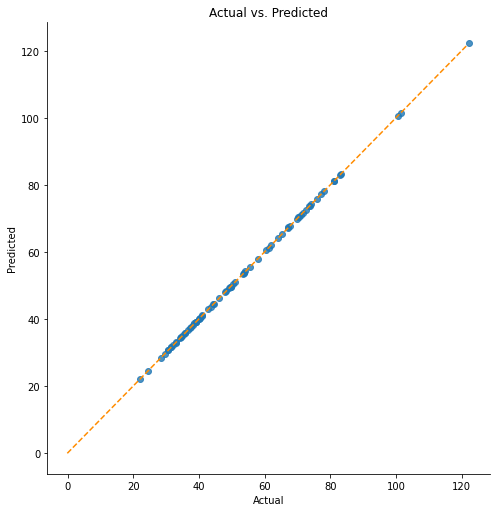

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


linear_assumption(costModel, features_df, country_df["Cost of Living Index_x"])

Nearly perfect linearity - don't like how clean all of this is. Maybe economists really do gauge this number off of these factors and this truly is just validating that work?

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.01 generally means non-normal: 0.023646470591952965
Residuals are normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


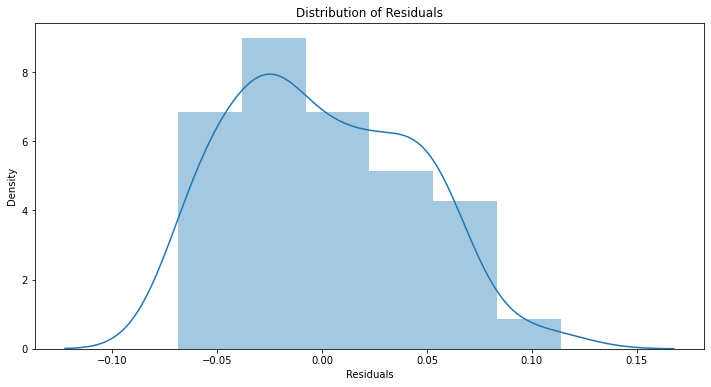


Assumption satisfied


In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.01):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.01 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

normal_errors_assumption(costModel, features_df, country_df["Cost of Living Index_x"])

On the edge here with normal errors. If pVal were .05 this assumption would not be considered satisfied. You can see with the bar chart that we're not perfectly even with our distribution.

We'll want to keep a close eye on our confidence intervals. Some bias will likely be present.

Assumption 3: Little to no multicollinearity among predictors


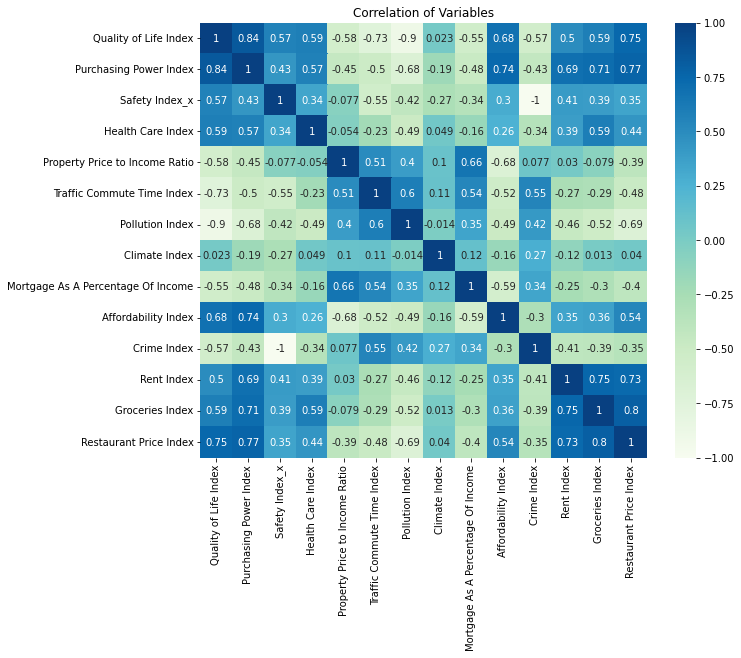

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')

    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True, cmap = "GnBu")
    plt.title('Correlation of Variables')
    plt.show()

multicollinearity_assumption(costModel, features_df, country_df["Cost of Living Index_x"])

This heatmap is not as clean as we'd like to see. There are definitely some strong correlations here, so our data doesn't pass the multicollinearity assumption. 

(I don't really know what this means in a tangible sense, but will press ahead anyway for the sake of gaining a better exposure to a multiple regression) 

Would love feedback on this specifically - I don' have a solid grasp on it. From what I understand, this assumption implies our variables are too "intertwined"? Meaning the ending regression will be too biased toward certain variables?

In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(costModel, features_df, country_df["Cost of Living Index_x"])

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9585642006249975
Little to no autocorrelation 

Assumption satisfied


No autocorrelation of the error terms. Appears we aren't missing any information that should be captured by our model. 

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


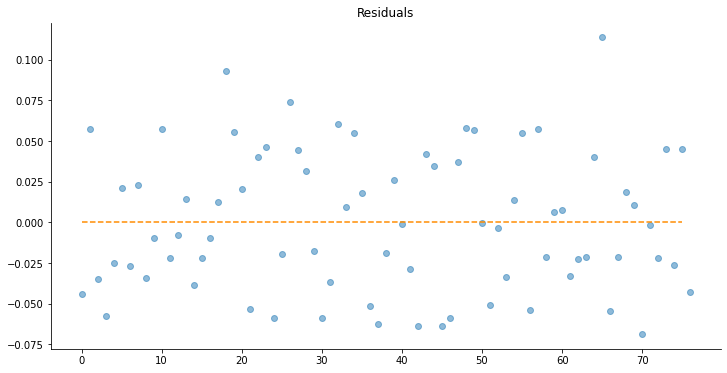

In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

homoscedasticity_assumption(costModel, features_df, country_df["Cost of Living Index_x"])

Homoscedasticity looks greas (well scattered)

Apart from some multicollinearity bias, all of our other assumptions appear to be checked rather well for this model. 

We are good to take a look at our linear regression as long as we understand that we shouldn't make any concrete conclusions from these numbers. Since all of our assumptions weren't checked, we can think of these numbers being formulated as essentially "made-up" for now.

In [ ]:
# Adding the intercept constant for the statsmodels API
X_train_for_statsmodels_api = sm.add_constant(features_df, prepend=False)

# Fitting the model and viewing the model summary
mod = sm.OLS(country_df["Cost of Living Index_x"], X_train_for_statsmodels_api)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Cost of Living Index_x   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 1.045e+06
Date:                    Tue, 22 Mar 2022   Prob (F-statistic):          1.00e-162
Time:                            00:22:51   Log-Likelihood:                 133.75
No. Observations:                      77   AIC:                            -239.5
Df Residuals:                          63   BIC:                            -206.7
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Lots of things to interperet here! The coefficients tell us what to multiply our features by in order to get our output. The way of interpreting them is that for every increase in the feature by 1 (holding all else equal), the label changes by the coefficient. 

If we refer to the Quality of Life Index in the output of our model, for every increase of one Quality of Life metric and nothing else, our Cost of Living Index will decrease by 9.97, increasing the Pollution Index by one decreases Cost of Living by 6.64, and so on. 

# Write Up

OK, I decided to do the economic data sets of all the countries. These data sets have various information such as healthcare, real estate prices, population, quality of life, etc. I thought this information would be interesting to do a multiple regression on simply due to the fact that there is so much information to work with. It would be pretty fun to see how all of these variables might be affecting cost of living across the globe. This was my first real exposure to a good multiple regression, and as such, I took it as a learning experience. First step in this process was to join all of these different CSV files together into one usable data frame. With that data frame in place, within decided to pick out which variables were gonna make the most sense to compare with our cost of living. Once that was all sorted out it was time to check all of the assumptions for our multiple linear regression. I found this information out online. I’m assuming it’s what you’d probably would do for a multiple regression in any case, ours being no exception. We’re supposed to create our model and see that it was pretty accurate. Ours was getting an R squared of nearly 100% she may be a bit nervous but figured that’s probably good possibly. Also check the residuals after the model was built out. From there we check the linear assumption which looks good. The normal arrows assumption also looked OK they’re not quite as evenly distributed as we’d like. When it got to multi collinearity assumptions, Our data did have a lot of other relationships which probably biased our outcome quite a bit. Autocorrelation assumptions looked good. This was a Durbin Watson test which came out within range. Don’t really know what this means though. Homoscedasticity also looked solid, everything was really well scattered I didn’t see any issues there. Only real possible problem was going to be the multicollinearity. Our actual OLS regression results looked good. Some of the P values were pretty high so that probably means there’s not much weight to be attributed to those variables specifically. Also the mortgage as a percentage of income had a really weird standard error don’t really know what that was about. Overall it was a pretty good learning experience though I had a lot of fun.

## Notes
Some column are derivatives of others - if a linear combination the regression will fail - choose columns that aren't derived from others - need to only have one in that case. 

Machine learning libraries might be useful with multiple variables. Logistic State

Regression is built into pysch it learn _ check stats packages - similar.

Append additional variabels with ~ (tildy)

Think about categorical variables, possibly nest levels, or dummy variables.